In [186]:
import pandas as pd

bank_df = pd.read_csv('C:\\study\\workspace_python\\pdsample\\datasets\\mydata\\bank.csv')

In [187]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
#목표변수 deposit

print(bank_df.shape)
bank_df.info()

(11162, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<AxesSubplot:>

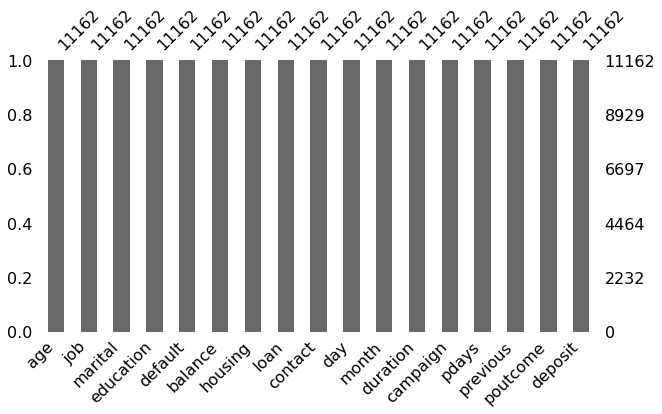

In [8]:
import missingno as msno

msno.bar(bank_df, figsize = (10, 5))

In [11]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [25]:
import seaborn as sns

counts = bank_df['deposit'].value_counts().reset_index()
counts = counts.rename({'index':'results'}, axis = 1)
sns.barplot(x = 'results',y = 'deposit', data = counts)

In [48]:
bank_df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

<AxesSubplot:xlabel='results', ylabel='deposit'>

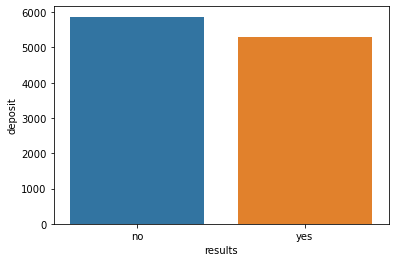

In [35]:
sns.barplot(x = 'results',y = 'deposit', data = counts)

<AxesSubplot:xlabel='deposit', ylabel='count'>

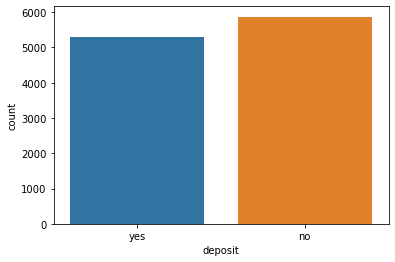

In [49]:
sns.countplot(x = 'deposit', data = bank_df)

In [72]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [188]:
bank_df.drop(['contact','day','month','duration','campaign','pdays','previous','poutcome'], axis = 1, inplace = True)


In [189]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
list1 = ['default','housing','loan','deposit']
for i in list1:
    bank_df[i] = encoder.fit_transform(bank_df[i])

bank_df

,age,job,marital,education,default,balance,housing,loan,deposit
0,59,admin.,married,secondary,0,2343,1,0,1
1,56,admin.,married,secondary,0,45,0,0,1
2,41,technician,married,secondary,0,1270,1,0,1
3,55,services,married,secondary,0,2476,1,0,1
4,54,admin.,married,tertiary,0,184,0,0,1
...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,0
11158,39,services,married,secondary,0,733,0,0,0
11159,32,technician,single,secondary,0,29,0,0,0
11160,43,technician,married,secondary,0,0,0,1,0


In [80]:
# bank_df['default'] = bank_df['default'].apply(lambda x : 1 if x == 'yes' else 0)

In [171]:
bank_df = pd.get_dummies(bank_df, columns = ['job','marital','education'])
bank_df

,age,default,balance,housing,loan,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,59,0,2343,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,56,0,45,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,41,0,1270,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,55,0,2476,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,54,0,184,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
11158,39,0,733,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
11159,32,0,29,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
11160,43,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [190]:
target_df = bank_df['deposit']

In [191]:
train_df = bank_df.drop(['deposit'],axis = 1)

In [192]:
bank_df

,age,job,marital,education,default,balance,housing,loan,deposit
0,59,admin.,married,secondary,0,2343,1,0,1
1,56,admin.,married,secondary,0,45,0,0,1
2,41,technician,married,secondary,0,1270,1,0,1
3,55,services,married,secondary,0,2476,1,0,1
4,54,admin.,married,tertiary,0,184,0,0,1
...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,0
11158,39,services,married,secondary,0,733,0,0,0
11159,32,technician,single,secondary,0,29,0,0,0
11160,43,technician,married,secondary,0,0,0,1,0


In [193]:
target_df

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int32